In [118]:
import os
import numpy as np                                                                               # Importing numpy for Matrix Operations
import pandas as pd                                                                              # Importing pandas to read CSV files
import matplotlib.pyplot as plt                                                                  # Importting matplotlib for Plotting and visualizing images
import math
import cv2                                                                                       # Importing openCV for image processing
import seaborn as sns                                                                            # Importing seaborn to plot graphs


# Tensorflow modules
import tensorflow as tf
import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator                              # Importing the ImageDataGenerator for data augmentation
from tensorflow.keras.models import Sequential                                                   # Importing the sequential module to define a sequential model
from tensorflow.keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D,BatchNormalization # Defining all the layers to build our CNN Model
from tensorflow.keras.optimizers import Adam,SGD                                                 # Importing the optimizers which can be used in our model
from sklearn import preprocessing                                                                # Importing the preprocessing module to preprocess the data
from sklearn.model_selection import train_test_split                                             # Importing train_test_split function to split the data into train and test
from sklearn.metrics import confusion_matrix                                                     # Importing confusion_matrix to plot the confusion matrix

# Display images using OpenCV

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')
# Mount Google drive to access the dataset (monkeys_dataset.zip)
import zipfile
import csv
import pickle

In [165]:
labels = []
path = "Dataset/Test/Female"
file_names = []
# iterate through the names of contents of the folder
for image_path in os.listdir(path):
    labels.append("female")
    input_path = os.path.join(path, image_path)
    file_names.append(input_path)
path = "Dataset/Test/Male"
# iterate through the names of contents of the folder
for image_path in os.listdir(path):
    labels.append("male")
    input_path = os.path.join(path, image_path)
    file_names.append(input_path)
print(len(file_names))
print(len(labels))

20001
20001


In [166]:
images = []
for x in file_names:
    img = cv2.imread(x)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    images.append(img)


In [167]:
images = np.array(images)

In [168]:
def scale_resize_image(image):
    image = tf.image.convert_image_dtype(image, tf.float32) # equivalent to dividing image pixels by 255
    image = tf.image.resize(image, (128, 128)) # Resizing the image to 224x224 dimention
    return image
resized_images = []
for x in images:
    x=scale_resize_image(x)
    resized_images.append(x)


In [169]:
resized_images = np.array(resized_images)

female


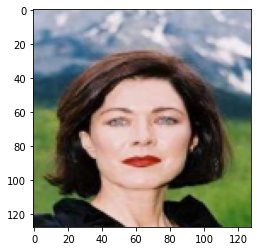

In [174]:
print(labels[2000])
plt.imshow(resized_images[2000])

In [175]:
from sklearn.model_selection import train_test_split
X_temp, X_test, y_temp, y_test = train_test_split(resized_images, labels , test_size=0.1, random_state=42, shuffle = True, stratify=labels)
X_train, X_val, y_train, y_val = train_test_split(X_temp,y_temp , test_size=0.3, random_state=42, shuffle = True, stratify=y_temp)

In [176]:
X_train, X_test, y_train, y_test, X_val, y_val = np.array(X_train), np.array(X_test), np.array(y_train), np.array(y_test), np.array(X_val), np.array(y_val)

print(X_train.shape,y_train.shape)
print(X_val.shape,y_val.shape)
print(X_test.shape,y_test.shape)

(12600, 128, 128, 3) (12600,)
(5400, 128, 128, 3) (5400,)
(2001, 128, 128, 3) (2001,)


In [177]:
from sklearn.preprocessing import LabelBinarizer
enc = LabelBinarizer()
y_train_encoded = enc.fit_transform(y_train)
y_val_encoded=enc.transform(y_val)
y_test_encoded=enc.transform(y_test)

In [178]:
X_train_normalized = X_train
X_val_normalized = X_val
X_test_normalized = X_test

In [179]:
# Intializing a sequential model
model = Sequential()

model.add(Conv2D(48, (3, 3), activation='relu', padding="same", input_shape=(128, 128, 3)))

model.add(MaxPooling2D((2, 2), padding = 'same'))

model.add(Conv2D(32, (3,3), activation='relu', padding = 'same'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())

model.add(Dense(32, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(1, activation='sigmoid'))


opt=tf.keras.optimizers.Adam()
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 128, 128, 48)      1344      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 64, 64, 48)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 64, 64, 32)        13856     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 32768)             0         
                                                                 
 dense_10 (Dense)            (None, 32)               

In [268]:
history_1 = model.fit(
            X_train_normalized, y_train_encoded,
            epochs=1,
            validation_data=(X_val_normalized,y_val_encoded),
            batch_size=1,
            verbose=1
)

12600/12600 [==============================] - 384s 30ms/step - loss: 0.2249 - accuracy: 0.9156 - val_loss: 0.1726 - val_accuracy: 0.9298


[0.14990374445915222, 0.9350324869155884]


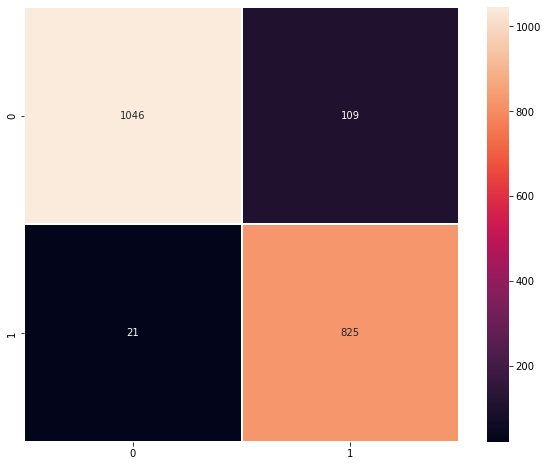

In [269]:
accuracy = model.evaluate(X_test_normalized, y_test_encoded, verbose=0)
y_pred=model.predict(X_test_normalized)
print(accuracy)
prediction = []
for x in y_pred:
    if x > 0.5:
        prediction.append(1)
    else:
        prediction.append(0)

# Plotting the Confusion Matrix using confusion matrix() function which is also predefined tensorflow module
confusion_matrix = tf.math.confusion_matrix(y_test_encoded,prediction)
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax
)
plt.show()

In [182]:
import pickle
save_path = './GENDER TESTING/model.h5'
model.save(save_path)

In [271]:
path = "Dataset/Train/Female"
file_names = []
# iterate through the names of contents of the folder
for image_path in os.listdir(path):
    if os.path.isfile(os.path.join(path, image_path)):
        input_path = os.path.join(path, image_path)
        file_names.append(input_path)
    if len(file_names) == 5000:
        break
path = "Dataset/Train/Male"
for image_path in os.listdir(path):
    if os.path.isfile(os.path.join(path, image_path)):
        input_path = os.path.join(path, image_path)
        file_names.append(input_path)
    if len(file_names) == 10000:
        break
file_names.insert(0, "Dataset\Test\Male\woman.jpg")


In [282]:
path = "Dataset/Validation/Female"
file_names = []
# iterate through the names of contents of the folder
for image_path in os.listdir(path):
    if os.path.isfile(os.path.join(path, image_path)):
        input_path = os.path.join(path, image_path)
        file_names.append(input_path)
    if len(file_names) == 50:
        break
print(file_names)

['Dataset/Validation/Female\\180003.jpg', 'Dataset/Validation/Female\\180007.jpg', 'Dataset/Validation/Female\\180011.jpg', 'Dataset/Validation/Female\\180015.jpg', 'Dataset/Validation/Female\\180019.jpg', 'Dataset/Validation/Female\\180021.jpg', 'Dataset/Validation/Female\\180022.jpg', 'Dataset/Validation/Female\\180024.jpg', 'Dataset/Validation/Female\\180025.jpg', 'Dataset/Validation/Female\\180026.jpg', 'Dataset/Validation/Female\\180029.jpg', 'Dataset/Validation/Female\\180030.jpg', 'Dataset/Validation/Female\\180031.jpg', 'Dataset/Validation/Female\\180032.jpg', 'Dataset/Validation/Female\\180033.jpg', 'Dataset/Validation/Female\\180034.jpg', 'Dataset/Validation/Female\\180035.jpg', 'Dataset/Validation/Female\\180036.jpg', 'Dataset/Validation/Female\\180037.jpg', 'Dataset/Validation/Female\\180040.jpg', 'Dataset/Validation/Female\\180042.jpg', 'Dataset/Validation/Female\\180044.jpg', 'Dataset/Validation/Female\\180045.jpg', 'Dataset/Validation/Female\\180046.jpg', 'Dataset/Valida

In [283]:
restimages = []
for x in file_names:
    img = cv2.imread(x)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    restimages.append(img)


In [284]:
redone_images = []
for img in restimages:
    img = np.expand_dims(img, axis = 0)
    redone_images.append(img)
print(redone_images[0].shape)

(1, 218, 178, 3)


In [285]:
def scale_resize_image(image):
    image = tf.image.convert_image_dtype(image, tf.float32) # equivalent to dividing image pixels by 255
    image = tf.image.resize(image, (128, 128)) # Resizing the image to 224x224 dimention
    return image
resized_images1 = []
for x in redone_images:
    x=scale_resize_image(x)
    resized_images1.append(x)


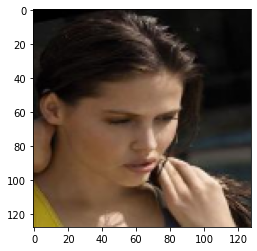

female


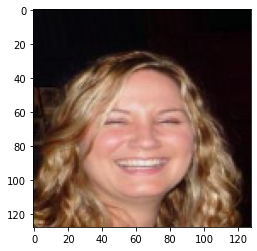

female


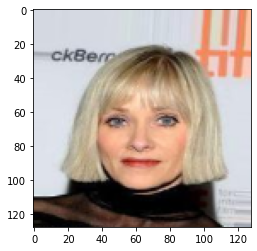

female


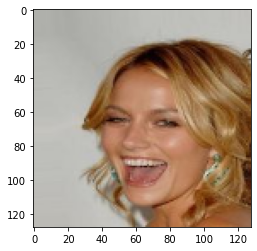

female


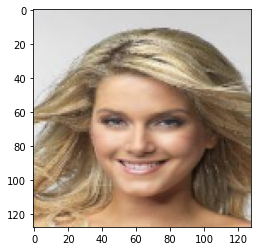

female


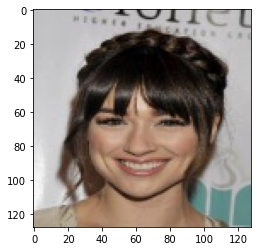

female


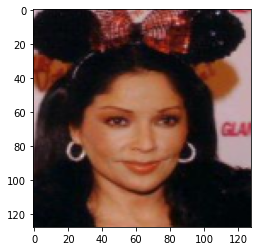

female


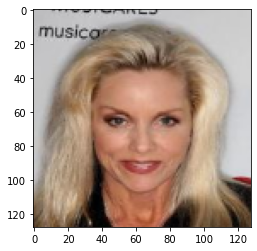

female


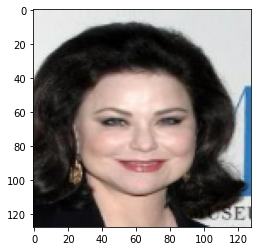

female


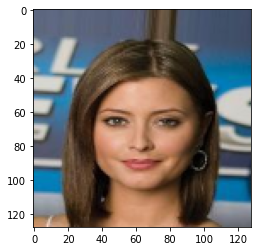

female


In [286]:
import random
x = resized_images1[0]
random.shuffle(resized_images1)
resized_images1[0] = x
counter = 0
for x in resized_images1:
    for z in x:
        plt.imshow(z)
        plt.show()
        
    pred = model.predict(x)
    if pred > .5:
        print("male")
    else:
        print("female")    
    counter+=1
    if counter==10:
        break



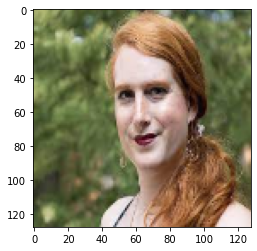

[[0.9829568]]
male


In [295]:
x = "GENDER TESTING\images\woman.jpg"
img = cv2.imread(x)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = np.expand_dims(img, axis = 0)
x = scale_resize_image(img)
for z in x:
    plt.imshow(z)
    plt.show()

pred = model.predict(x)
print(pred)
if pred > .5:
    print("male")
else:
    print("female")    
counter+=1
